<a href="https://colab.research.google.com/github/Prudhvi-27/Stock_Price_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas numpy matplotlib tensorflow scikit-learn yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [4]:
path = "/content/drive/MyDrive/Machine_Learning_Project/RELI.csv"

In [7]:
df = pd.read_csv(path)

For most stock prediction models, the Close price is the primary target to predict. You can choose to use other columns like Open, High, Low, or Volume as features for training.

In [8]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,27-11-2024,"1,293.90","1,293.35","1,295.35","1,286.10",4.90M,-0.14%
1,26-11-2024,"1,295.70","1,294.95","1,297.85","1,284.20",9.25M,0.68%
2,25-11-2024,"1,287.00","1,290.00","1,304.45","1,282.45",28.92M,1.71%
3,22-11-2024,"1,265.40","1,229.40","1,268.85","1,222.45",20.47M,3.47%
4,21-11-2024,"1,223.00","1,241.65","1,243.95","1,217.25",19.43M,-1.50%


In [9]:
close_prices = df['Price'].values

If there are missing values in your dataset, you can either drop them or fill them with an appropriate value (like the mean or forward fill).

python
Copy code


In [10]:
stock_data = df.dropna()


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].map(lambda x: x.toordinal())
close_prices = df['Price'].values
print(close_prices[:5])


['1,293.90' '1,295.70' '1,287.00' '1,265.40' '1,223.00']


<ipython-input-11-4dcd89195b12>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Normalize the Data
LSTMs perform better with normalized or scaled data. Use MinMaxScaler to scale the Close values between 0 and 1:

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
#
scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))


print(scaled_data[:5])


[[0.48977048]
 [0.49276205]
 [0.47830278]
 [0.4424039 ]
 [0.37193571]]


 Prepare Data for the LSTM Model
Create sequences of a fixed window size (e.g., 60 days) for training:

In [15]:
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

X = X.reshape((X.shape[0], X.shape[1], 1))


Build the LSTM Model
Create and compile an LSTM model:

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train the Model
Split the data into training and testing sets:

In [17]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1834
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0187
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0173
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0135
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0103
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0085
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0078
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0069
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0062
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0072
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0065
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0053
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0052
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0069
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0064
Epoc

Test the Model
Make predictions on the test set and invert the scaling:

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step


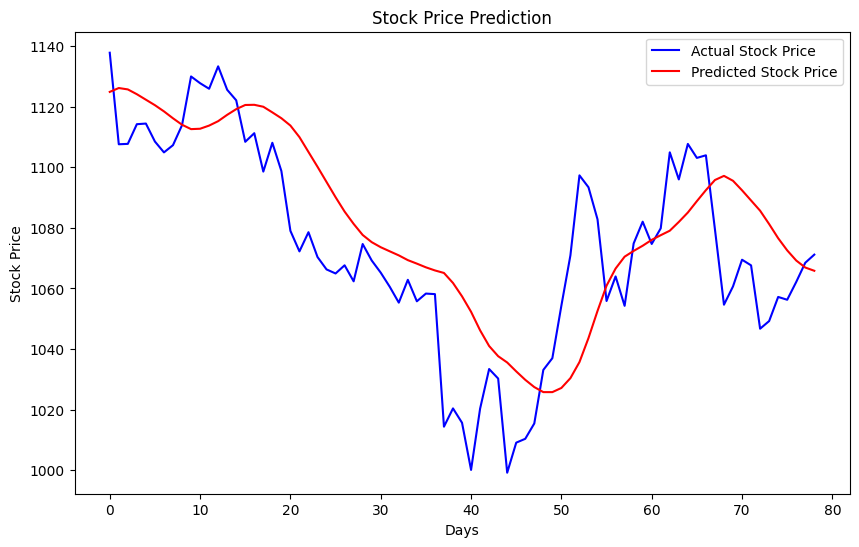

In [18]:
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
